# Personal Task

Web-user identification is a hot research topic on the brink of sequential pattern mining and behavioral psychology.

Here we try to identify a user on the Internet tracking his/her sequence of attended Web pages. The algorithm to be built will take a webpage session (a sequence of webpages attended consequently by the same person) and predict whether it belongs to Alice or somebody else.

The data comes from Blaise Pascal University proxy servers. Paper "A Tool for Classification of Sequential Data" by Giacomo Kahn, Yannick Loiseau and Olivier Raynaud.

# Credit (you can also find data files there)
https://www.kaggle.com/competitions/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2

# Data Reading

In [1]:
# Import libraries and set desired options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading from csv
train_df = pd.read_csv('../input/train_sessions.csv',
                       index_col='session_id', parse_dates=['time1'])
test_df = pd.read_csv('../input/test_sessions.csv',
                      index_col='session_id', parse_dates=['time1'])

# Sort the data by time
train_df = train_df.sort_values(by='time1')

# Look at the first rows of the training set
train_df.head(3)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,945.0,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0


# Data tidying


In [3]:
sites = ['site%s' % i for i in range(1, 11)]
times = ['time%s' % i for i in range(1, 11)]

In [4]:
train_df['year']=train_df['time1'].apply(lambda arr:arr.year)
train_df['hour']=train_df['time1'].apply(lambda arr:arr.hour)
train_df['day_of_week']=train_df['time1'].apply(lambda t: t.weekday())
train_df['month']=train_df['time1'].apply(lambda t: t.month)
sessduration = (train_df[times].apply(pd.to_datetime).max(axis=1) - train_df[times].apply(pd.to_datetime).min(axis=1)).astype('timedelta64[ms]').astype('int')
train_df['sessduration']=np.log1p(sessduration)

In [5]:
train_df[train_df["target"]==1].head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target,year,hour,day_of_week,month,sessduration
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,
251175,270,2013-02-12 16:25:10,270.0,2013-02-12 16:25:11,270.0,2013-02-12 16:32:10,21.0,2013-02-12 16:32:11,21.0,2013-02-12 16:32:24,7832.0,2013-02-12 16:32:25,21.0,2013-02-12 16:32:25,7832.0,2013-02-12 16:32:26,30.0,2013-02-12 16:32:27,7832.0,2013-02-12 16:32:27,1,2013,16,1,2,12.987691
196388,29,2013-02-12 16:32:27,7832.0,2013-02-12 16:32:28,37.0,2013-02-12 16:32:29,7832.0,2013-02-12 16:32:34,7832.0,2013-02-12 16:32:35,29.0,2013-02-12 16:32:35,7832.0,2013-02-12 16:32:42,29.0,2013-02-12 16:32:42,7832.0,2013-02-12 16:32:51,7832.0,2013-02-12 16:32:53,1,2013,16,1,2,10.165890
172448,29,2013-02-12 16:32:53,7832.0,2013-02-12 16:33:11,7832.0,2013-02-12 16:33:12,29.0,2013-02-12 16:33:13,37.0,2013-02-12 16:33:15,7832.0,2013-02-12 16:33:24,29.0,2013-02-12 16:33:24,7832.0,2013-02-12 16:33:33,29.0,2013-02-12 16:33:34,270.0,2013-02-12 16:33:46,1,2013,16,1,2,10.878066
70129,167,2013-02-12 16:33:50,167.0,2013-02-12 16:33:51,1515.0,2013-02-12 16:33:52,167.0,2013-02-12 16:33:52,37.0,2013-02-12 16:33:52,1514.0,2013-02-12 16:33:52,855.0,2013-02-12 16:33:52,1515.0,2013-02-12 16:33:53,855.0,2013-02-12 16:33:53,1514.0,2013-02-12 16:33:53,1,2013,16,1,2,8.006701
206254,1520,2013-02-12 16:33:55,1522.0,2013-02-12 16:33:56,1522.0,2013-02-12 16:34:01,1515.0,2013-02-12 16:34:12,1515.0,2013-02-12 16:34:13,1524.0,2013-02-12 16:34:24,1514.0,2013-02-12 16:34:24,1515.0,2013-02-12 16:34:24,1520.0,2013-02-12 16:34:25,1521.0,2013-02-12 16:34:25,1,2013,16,1,2,10.308986


In [6]:
train_df.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 21669 to 204762
Data columns (total 26 columns):
site1           253561 non-null int64
time1           253561 non-null datetime64[ns]
site2           253561 non-null float64
time2           253561 non-null object
site3           253561 non-null float64
time3           253561 non-null object
site4           253561 non-null float64
time4           253561 non-null object
site5           253561 non-null float64
time5           253561 non-null object
site6           253561 non-null float64
time6           253561 non-null object
site7           253561 non-null float64
time7           253561 non-null object
site8           253561 non-null float64
time8           253561 non-null object
site9           253561 non-null float64
time9           253561 non-null object
site10          253561 non-null float64
time10          253561 non-null object
target          253561 non-null int64
year            253561 non-null int64
hour         

In [7]:
train_df.describe()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,year,hour,day_of_week,month,sessduration
count,253561.000000,250098.000000,246919.000000,244321.000000,241829.000000,239495.000000,237297.000000,235224.000000,233084.000000,231052.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000
mean,3243.550144,3272.400883,3303.987757,3325.109422,3343.406035,3352.312637,3395.546771,3430.157765,3438.400088,3460.388861,0.009059,2013.705495,12.288483,2.289741,4.511285,10.047134
std,7247.006212,7307.480404,7347.809918,7371.245606,7379.758550,7380.413775,7435.727671,7473.417900,7471.062652,7492.447548,0.094747,0.455821,3.159420,1.610467,3.721295,2.468383
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2013.000000,7.000000,0.000000,1.000000,0.000000
25%,53.000000,53.000000,53.000000,52.000000,52.000000,52.000000,55.000000,55.000000,55.000000,55.000000,0.000000,2013.000000,10.000000,1.000000,2.000000,8.853808
50%,677.000000,677.000000,677.000000,677.000000,678.000000,679.000000,679.000000,704.000000,733.000000,733.000000,0.000000,2014.000000,12.000000,2.000000,3.000000,10.203629
75%,1980.000000,1980.000000,1986.500000,1995.000000,2054.000000,2077.000000,2197.000000,2287.000000,2366.000000,2403.000000,0.000000,2014.000000,15.000000,4.000000,4.000000,11.635152
max,41601.000000,41600.000000,41599.000000,41599.000000,41599.000000,41600.000000,41600.000000,41601.000000,41601.000000,41601.000000,1.000000,2014.000000,23.000000,6.000000,12.000000,14.403298


In [8]:
# How many times it was Alice
train_df['target'].value_counts(normalize=False)

0    251264
1      2297
Name: target, dtype: int64

In [9]:
train_df.groupby('target').count()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,year,hour,day_of_week,month,sessduration
target,,,,,,,,,,,,,,,,,,,,,,,,,
0,251264,251264,247804,247804,244632,244632,242035,242035,239549,239549,237222,237222,235028,235028,232961,232961,230822,230822,228794,228794,251264,251264,251264,251264,251264
1,2297,2297,2294,2294,2287,2287,2286,2286,2280,2280,2273,2273,2269,2269,2263,2263,2262,2262,2258,2258,2297,2297,2297,2297,2297


In [10]:
train_df.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target,year,hour,day_of_week,month,sessduration
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2013,8,5,1,0.000000
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2013,8,5,1,14.395490
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,945.0,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0,2013,8,5,1,8.294300
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,946.0,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0,2013,8,5,1,8.006701
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,952.0,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0,2013,8,5,1,7.601402


In [11]:
train_df.groupby('target')['sessduration','month','day_of_week','hour','year'].describe().T

target                          0            1
sessduration count  251264.000000  2297.000000
             mean       10.052340     9.477611
             std         2.473656     1.707681
             min         0.000000     0.000000
             25%         8.853808     8.294300
             50%        10.239996     9.305741
             75%        11.643962    10.545368
             max        14.403298    14.382528
month        count  251264.000000  2297.000000
             mean        4.498647     5.893774
             std         3.717184     3.907805
             min         1.000000     1.000000
             25%         2.000000     2.000000
             50%         3.000000     4.000000
             75%         4.000000    11.000000
             max        12.000000    12.000000
day_of_week  count  251264.000000  2297.000000
             mean        2.296186     1.584676
             std         1.609149     1.599186
             min         0.000000     0.000000
             25%         1.000000     0.000000
             50%         2.000000     1.000000
             75%         4.000000     3.000000
             max         6.000000     6.000000
hour         count  251264.000000  2297.000000
             mean       12.259731    15.433609
             std         3.153245     2.065365
             min         7.000000     9.000000
             25%        10.000000    13.000000
             50%        12.000000    16.000000
             75%        14.000000    17.000000
             max        23.000000    18.000000
year         count  251264.000000  2297.000000
             mean     2013.707005  2013.540270
             std         0.455137     0.498484
             min      2013.000000  2013.000000
             25%      2013.000000  2013.000000
             50%      2014.000000  2014.000000
             75%      2014.000000  2014.000000
             max      2014.000000  2014.000000

# Data analyzing with graphics


### Quantitative

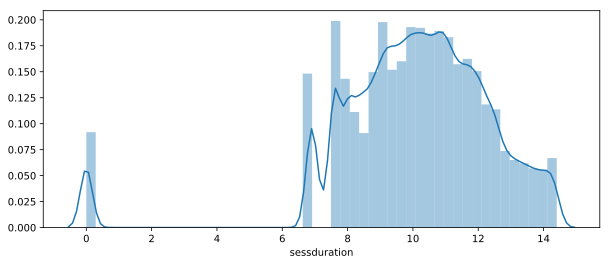

In [13]:
plt.figure(figsize=(10, 4))
sns.distplot(train_df['sessduration'])

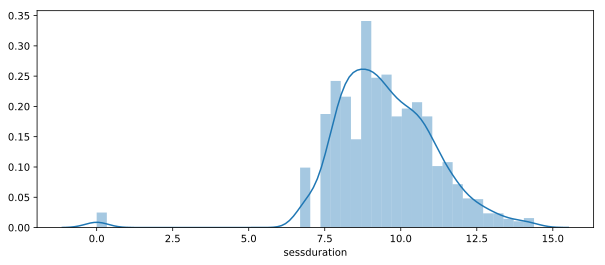

In [14]:
plt.figure(figsize=(10, 4))
sns.distplot(train_df[train_df['target']==1]['sessduration'])

### Categorical

In [15]:
train_df.columns

Index(['site1', 'time1', 'site2', 'time2', 'site3', 'time3', 'site4', 'time4',
       'site5', 'time5', 'site6', 'time6', 'site7', 'time7', 'site8', 'time8',
       'site9', 'time9', 'site10', 'time10', 'target', 'year', 'hour',
       'day_of_week', 'month', 'sessduration'],
      dtype='object')

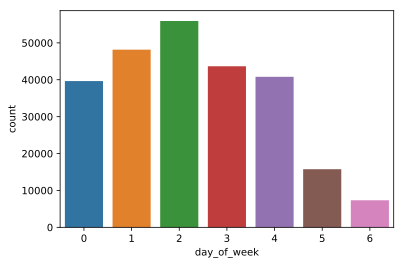

In [16]:
sns.countplot(x='day_of_week',data=train_df[train_df['target']==0])

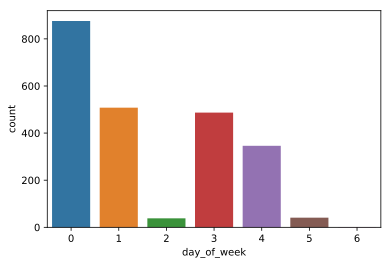

In [17]:
sns.countplot(x='day_of_week',data=train_df[train_df['target']==1])

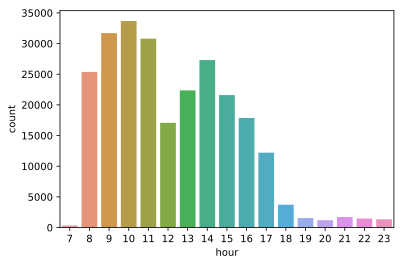

In [18]:
sns.countplot(x='hour',data=train_df[train_df['target']==0])

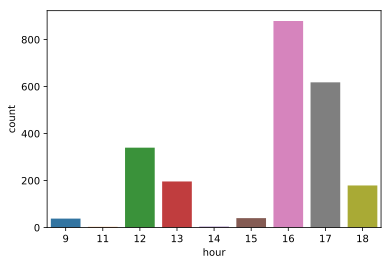

In [19]:
sns.countplot(x='hour',data=train_df[train_df['target']==1])

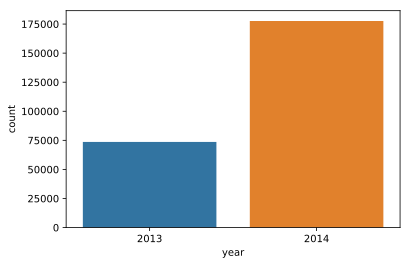

In [20]:
sns.countplot(x='year',data=train_df[train_df['target']==0])

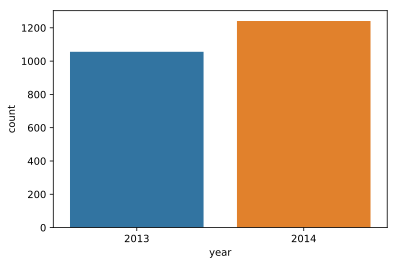

In [21]:
sns.countplot(x='year',data=train_df[train_df['target']==1])

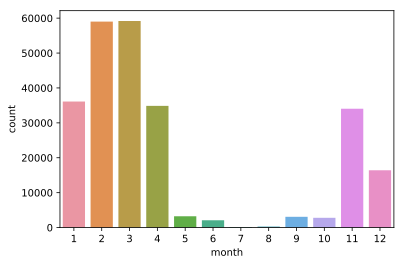

In [22]:
sns.countplot(x='month',data=train_df[train_df['target']==0])

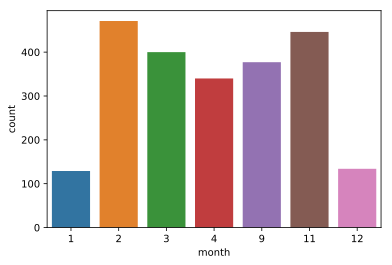

In [23]:
sns.countplot(x='month',data=train_df[train_df['target']==1])

### Multivariate

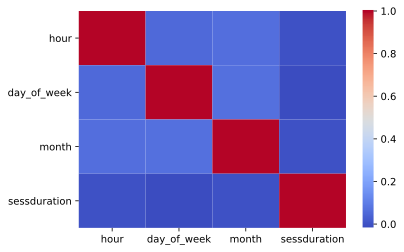

In [24]:
corr_matrix = train_df[['hour','day_of_week', 'month', 'sessduration']].corr()
sns.heatmap(corr_matrix,cmap='coolwarm');

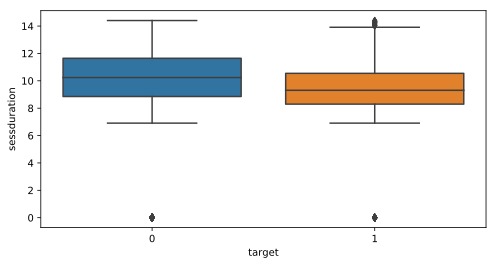

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='target',y='sessduration',data=train_df)

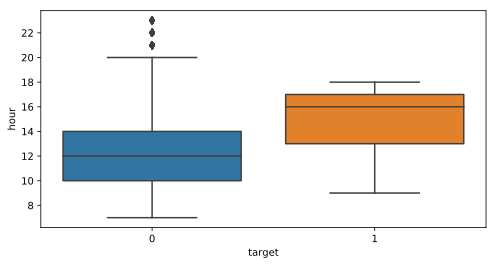

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='target',y='hour',data=train_df)

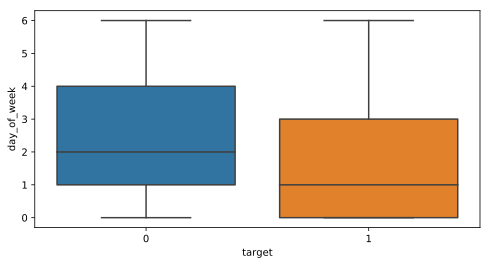

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='target',y='day_of_week',data=train_df)